In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from astropy.io import fits
from astropy.table import Table
import descartes
from mpl_toolkits import mplot3d
import plotly.express as px
from PIL import Image
from scipy.optimize import curve_fit

In [4]:
#Import the datafile
pd.set_option('display.max_columns', None)

hdulist1 = fits.open('../data/lamp_sci_0276616214_03.fit')
bin_tableHDU1 = hdulist1[3]
bin_data1 = Table(bin_tableHDU1.data)

df1 = bin_data1.to_pandas()
df1

,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL
0,130447,864,17,17,1899.956665,2.766167e+08,20372.197266,0.0,-25.719776,309.960907,-25.715816,309.965363,-25.715866,309.956482,-25.723692,309.956451,-25.723661,309.965332,45.813194,24.676811,0.338292,1.013145,0
1,130447,725,22,22,1647.598999,2.766167e+08,6879.057129,0.0,-25.719343,310.005951,-25.715330,310.010529,-25.715460,310.001404,-25.723381,310.001404,-25.723272,310.010529,45.813194,24.668009,1.916844,1.013145,0
2,130447,815,19,19,1811.011353,2.766167e+08,14219.691406,0.0,-25.719656,309.978760,-25.715672,309.983276,-25.715752,309.974274,-25.723616,309.974274,-25.723553,309.983276,45.813194,24.673361,0.964262,1.013145,0
3,130448,744,21,21,1682.097656,2.766167e+08,8230.705078,0.0,-25.719679,309.996826,-25.715673,310.001404,-25.715786,309.992310,-25.723688,309.992310,-25.723595,310.001373,45.813190,24.670025,1.597563,1.026641,0
4,130448,898,14,14,1961.651489,2.766167e+08,22404.753906,0.0,-25.720041,309.934479,-25.716129,309.938843,-25.716129,309.930115,-25.723900,309.930115,-25.723917,309.938843,45.813190,24.682022,0.589734,1.026641,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18370331,1295246,485,6,6,1211.965698,2.766213e+08,1.748454,0.0,87.798286,310.828033,87.802696,310.949890,87.803055,310.712219,87.793823,310.706940,87.793449,310.943604,55.395344,89.314545,2.999209,1.008725,0
18370332,1295249,499,5,5,1237.308716,2.766213e+08,1.744232,0.0,87.798027,310.591125,87.802422,310.711823,87.802765,310.475464,87.793549,310.471161,87.793190,310.706543,55.395279,89.314850,3.292636,1.008725,0
18370333,1295250,827,16,16,1832.368896,2.766213e+08,14.936611,0.0,87.792595,313.259460,87.797035,313.392853,87.797630,313.142792,87.788200,313.127045,87.787590,313.376007,55.395260,89.305229,0.037524,1.008725,0
18370334,1295250,489,5,5,1219.205811,2.766213e+08,1.655490,0.0,87.797813,310.591003,87.802208,310.711700,87.802551,310.475342,87.793343,310.471069,87.792984,310.706421,55.395260,89.314644,3.292636,1.008725,0


In [5]:

#Fiter for On Band
on_band = (1300,1550)
filt_on = (df1['WAVELENGTH'].between(on_band[0], on_band[1], inclusive='both'))
on_df = df1.loc[filt_on]
on_df
#print(on_df['WAVELENGTH'].max())

,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0
52,130454,636,9,9,1486.039673,2.766167e+08,3203.282227,0.0,-25.721066,309.891357,-25.717255,309.895630,-25.717175,309.887115,-25.724857,309.887115,-25.724953,309.895630,45.813179,24.691147,2.099581,1.045205,0
59,130455,663,23,23,1535.041626,2.766167e+08,4264.898926,0.0,-25.720913,310.015106,-25.716892,310.019714,-25.717039,310.010529,-25.724979,310.010529,-25.724854,310.019714,45.813179,24.667850,2.237864,1.054741,0
72,130456,642,6,6,1496.927979,2.766167e+08,3527.404785,0.0,-25.721130,309.866058,-25.717394,309.870270,-25.717266,309.861908,-25.724899,309.861877,-25.725042,309.870239,45.813175,24.696012,2.985033,1.054741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18370200,1295122,578,8,8,1380.448120,2.766213e+08,3.221002,0.0,87.823662,311.328644,87.828087,311.454285,87.828491,311.211304,87.819221,311.203827,87.818802,311.445770,55.398022,89.338814,2.407240,1.017604,0
18370250,1295164,542,23,23,1315.194336,2.766213e+08,2.159364,0.0,87.805817,315.085449,87.810165,315.228607,87.810966,314.967163,87.801407,314.943085,87.800583,315.203339,55.397114,89.318329,2.253958,1.008725,0
18370271,1295188,648,11,11,1507.425293,2.766213e+08,4.922534,0.0,87.808372,312.044128,87.812820,312.172424,87.813286,311.927277,87.803963,311.916748,87.803474,312.160828,55.396595,89.322311,1.506274,1.008725,0
18370272,1295188,539,22,22,1309.758301,2.766213e+08,2.247996,0.0,87.801559,314.812561,87.805923,314.954102,87.806694,314.694641,87.797150,314.671844,87.796364,314.930176,55.396595,89.313950,1.931096,1.008725,0


In [6]:
#Filteration for latitude
lati_moon = (-75, 75)

lati_sp = (on_df['LATITUDE'].between(lati_moon[0],lati_moon[1],inclusive='both'))
#Makes the off-band dataframe
on_df = on_df.loc[lati_sp]
on_df


,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0
52,130454,636,9,9,1486.039673,2.766167e+08,3203.282227,0.0,-25.721066,309.891357,-25.717255,309.895630,-25.717175,309.887115,-25.724857,309.887115,-25.724953,309.895630,45.813179,24.691147,2.099581,1.045205,0
59,130455,663,23,23,1535.041626,2.766167e+08,4264.898926,0.0,-25.720913,310.015106,-25.716892,310.019714,-25.717039,310.010529,-25.724979,310.010529,-25.724854,310.019714,45.813179,24.667850,2.237864,1.054741,0
72,130456,642,6,6,1496.927979,2.766167e+08,3527.404785,0.0,-25.721130,309.866058,-25.717394,309.870270,-25.717266,309.861908,-25.724899,309.861877,-25.725042,309.870239,45.813175,24.696012,2.985033,1.054741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264945,1213431,615,20,20,1447.554077,2.766210e+08,3.680734,0.0,74.937569,128.647095,74.932510,128.627853,74.932793,128.666840,74.942604,128.666275,74.942352,128.627274,57.008602,106.498695,1.291526,1.013145,0
18264959,1213446,660,10,10,1529.214844,2.766210e+08,5.077387,0.0,74.942116,129.026291,74.937294,129.007980,74.937309,129.044876,74.946899,129.044571,74.946899,129.007645,57.008339,106.503983,1.810514,1.008725,0
18265029,1213510,625,13,13,1465.697632,2.766210e+08,4.165173,0.0,74.955482,128.914185,74.950569,128.895584,74.950668,128.933121,74.960320,128.932739,74.960243,128.895172,57.007214,106.487854,0.898229,1.008725,0
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0


In [7]:
#Creating Longitude bins
# Define the bin edges
bin_edges = [-75, -65, -55,-45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65, 75]

# Define the bin labels (one fewer than the number of bin edges)
bin_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15']

# Bin the 'LONGITUDE' values and create a new column 'Long_Bin'
def lati_bin(df):
    df['Long_Bin'] = pd.cut(df['LATITUDE'], bins=bin_edges, labels=bin_labels, include_lowest=True)
    
lati_bin(on_df)
on_df

/tmp/ipykernel_243905/2707740874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long_Bin'] = pd.cut(df['LATITUDE'], bins=bin_edges, labels=bin_labels, include_lowest=True)


,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5
52,130454,636,9,9,1486.039673,2.766167e+08,3203.282227,0.0,-25.721066,309.891357,-25.717255,309.895630,-25.717175,309.887115,-25.724857,309.887115,-25.724953,309.895630,45.813179,24.691147,2.099581,1.045205,0,5
59,130455,663,23,23,1535.041626,2.766167e+08,4264.898926,0.0,-25.720913,310.015106,-25.716892,310.019714,-25.717039,310.010529,-25.724979,310.010529,-25.724854,310.019714,45.813179,24.667850,2.237864,1.054741,0,5
72,130456,642,6,6,1496.927979,2.766167e+08,3527.404785,0.0,-25.721130,309.866058,-25.717394,309.870270,-25.717266,309.861908,-25.724899,309.861877,-25.725042,309.870239,45.813175,24.696012,2.985033,1.054741,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264945,1213431,615,20,20,1447.554077,2.766210e+08,3.680734,0.0,74.937569,128.647095,74.932510,128.627853,74.932793,128.666840,74.942604,128.666275,74.942352,128.627274,57.008602,106.498695,1.291526,1.013145,0,15
18264959,1213446,660,10,10,1529.214844,2.766210e+08,5.077387,0.0,74.942116,129.026291,74.937294,129.007980,74.937309,129.044876,74.946899,129.044571,74.946899,129.007645,57.008339,106.503983,1.810514,1.008725,0,15
18265029,1213510,625,13,13,1465.697632,2.766210e+08,4.165173,0.0,74.955482,128.914185,74.950569,128.895584,74.950668,128.933121,74.960320,128.932739,74.960243,128.895172,57.007214,106.487854,0.898229,1.008725,0,15
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15


In [8]:
#Creating Wavelength bins
w_bin_edges = []
a = 1300
for i in range(0,1001):
    m = a + i*0.25
    w_bin_edges.append(m)
    
# Define the range
start_value = 0
end_value = 1000

a = 130 #b=155

# Generate bin labels as strings
w_bin_labels = [float((str(a + 0.025*i) )) for i in range(start_value, end_value)]

on_df['Wave_Bin'] = pd.cut(on_df['WAVELENGTH'], bins=w_bin_edges, labels=w_bin_labels, include_lowest=True)

on_df

/tmp/ipykernel_243905/374780073.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_df['Wave_Bin'] = pd.cut(on_df['WAVELENGTH'], bins=w_bin_edges, labels=w_bin_labels, include_lowest=True)


,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700
52,130454,636,9,9,1486.039673,2.766167e+08,3203.282227,0.0,-25.721066,309.891357,-25.717255,309.895630,-25.717175,309.887115,-25.724857,309.887115,-25.724953,309.895630,45.813179,24.691147,2.099581,1.045205,0,5,148.600
59,130455,663,23,23,1535.041626,2.766167e+08,4264.898926,0.0,-25.720913,310.015106,-25.716892,310.019714,-25.717039,310.010529,-25.724979,310.010529,-25.724854,310.019714,45.813179,24.667850,2.237864,1.054741,0,5,153.500
72,130456,642,6,6,1496.927979,2.766167e+08,3527.404785,0.0,-25.721130,309.866058,-25.717394,309.870270,-25.717266,309.861908,-25.724899,309.861877,-25.725042,309.870239,45.813175,24.696012,2.985033,1.054741,0,5,149.675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264945,1213431,615,20,20,1447.554077,2.766210e+08,3.680734,0.0,74.937569,128.647095,74.932510,128.627853,74.932793,128.666840,74.942604,128.666275,74.942352,128.627274,57.008602,106.498695,1.291526,1.013145,0,15,144.750
18264959,1213446,660,10,10,1529.214844,2.766210e+08,5.077387,0.0,74.942116,129.026291,74.937294,129.007980,74.937309,129.044876,74.946899,129.044571,74.946899,129.007645,57.008339,106.503983,1.810514,1.008725,0,15,152.900
18265029,1213510,625,13,13,1465.697632,2.766210e+08,4.165173,0.0,74.955482,128.914185,74.950569,128.895584,74.950668,128.933121,74.960320,128.932739,74.960243,128.895172,57.007214,106.487854,0.898229,1.008725,0,15,146.550
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475


In [9]:
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Moon in kilometers
    moon_radius = 1737.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (np.sin(dlat/2))**2 + (np.cos(lat1) * np.cos(lat2)) * ((np.sin(dlon/2))**2)
    c = 2 * (np.arcsin(np.sqrt(a)))

    # Distance in kilometers
    distance = moon_radius * c

    return distance

def calculate_square_area(corners):
    # Calculate distances between consecutive corners
    side_lengths = [haversine(corners[i][0], corners[i][1], corners[(i + 1) % 4][0], corners[(i + 1) % 4][1]) for i in range(4)]

    # Calculate the area of the square
    s = sum(side_lengths) / 2
    area = np.sqrt((s - side_lengths[0]) * (s - side_lengths[1]) * (s - side_lengths[2]) * (s - side_lengths[3]))

    return area

# Example usage with corner coordinates in (latitude, longitude) pairs
def photon_count(df):
    corners = [(df['LATITUDE_UL'], df['LONGITUDE_UL']), (df['LATITUDE_LL'], df['LONGITUDE_LL']), (df['LATITUDE_UR'], df['LONGITUDE_UR']), (df['LATITUDE_LR'], df['LONGITUDE_LR'])]  # Replace with your coordinates

    df['A_eff(M2)'] = calculate_square_area(corners)* (10**6)
    df['PHOTON_COUNT'] = df['WEIGHTED_COUNT']/(df['A_eff(M2)'])/0.025
    df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    
photon_count(on_df)
on_df

/tmp/ipykernel_243905/24816496.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A_eff(M2)'] = calculate_square_area(corners)* (10**6)
/tmp/ipykernel_243905/24816496.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PHOTON_COUNT'] = df['WEIGHTED_COUNT']/(df['A_eff(M2)'])/0.025


,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948
52,130454,636,9,9,1486.039673,2.766167e+08,3203.282227,0.0,-25.721066,309.891357,-25.717255,309.895630,-25.717175,309.887115,-25.724857,309.887115,-25.724953,309.895630,45.813179,24.691147,2.099581,1.045205,0,5,148.600,76714.053750,1.670245
59,130455,663,23,23,1535.041626,2.766167e+08,4264.898926,0.0,-25.720913,310.015106,-25.716892,310.019714,-25.717039,310.010529,-25.724979,310.010529,-25.724854,310.019714,45.813179,24.667850,2.237864,1.054741,0,5,153.500,87212.011218,1.956106
72,130456,642,6,6,1496.927979,2.766167e+08,3527.404785,0.0,-25.721130,309.866058,-25.717394,309.870270,-25.717266,309.861908,-25.724899,309.861877,-25.725042,309.870239,45.813175,24.696012,2.985033,1.054741,0,5,149.675,74279.546738,1.899530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264945,1213431,615,20,20,1447.554077,2.766210e+08,3.680734,0.0,74.937569,128.647095,74.932510,128.627853,74.932793,128.666840,74.942604,128.666275,74.942352,128.627274,57.008602,106.498695,1.291526,1.013145,0,15,144.750,131546.080112,0.001119
18264959,1213446,660,10,10,1529.214844,2.766210e+08,5.077387,0.0,74.942116,129.026291,74.937294,129.007980,74.937309,129.044876,74.946899,129.044571,74.946899,129.007645,57.008339,106.503983,1.810514,1.008725,0,15,152.900,119582.854211,0.001698
18265029,1213510,625,13,13,1465.697632,2.766210e+08,4.165173,0.0,74.955482,128.914185,74.950569,128.895584,74.950668,128.933121,74.960320,128.932739,74.960243,128.895172,57.007214,106.487854,0.898229,1.008725,0,15,146.550,122963.197529,0.001355
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062


In [10]:
on_df['EXPOSURE_DURATION'] = 6786
on_df

/tmp/ipykernel_243905/519504553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_df['EXPOSURE_DURATION'] = 6786


,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597,6786
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948,6786
52,130454,636,9,9,1486.039673,2.766167e+08,3203.282227,0.0,-25.721066,309.891357,-25.717255,309.895630,-25.717175,309.887115,-25.724857,309.887115,-25.724953,309.895630,45.813179,24.691147,2.099581,1.045205,0,5,148.600,76714.053750,1.670245,6786
59,130455,663,23,23,1535.041626,2.766167e+08,4264.898926,0.0,-25.720913,310.015106,-25.716892,310.019714,-25.717039,310.010529,-25.724979,310.010529,-25.724854,310.019714,45.813179,24.667850,2.237864,1.054741,0,5,153.500,87212.011218,1.956106,6786
72,130456,642,6,6,1496.927979,2.766167e+08,3527.404785,0.0,-25.721130,309.866058,-25.717394,309.870270,-25.717266,309.861908,-25.724899,309.861877,-25.725042,309.870239,45.813175,24.696012,2.985033,1.054741,0,5,149.675,74279.546738,1.899530,6786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264945,1213431,615,20,20,1447.554077,2.766210e+08,3.680734,0.0,74.937569,128.647095,74.932510,128.627853,74.932793,128.666840,74.942604,128.666275,74.942352,128.627274,57.008602,106.498695,1.291526,1.013145,0,15,144.750,131546.080112,0.001119,6786
18264959,1213446,660,10,10,1529.214844,2.766210e+08,5.077387,0.0,74.942116,129.026291,74.937294,129.007980,74.937309,129.044876,74.946899,129.044571,74.946899,129.007645,57.008339,106.503983,1.810514,1.008725,0,15,152.900,119582.854211,0.001698,6786
18265029,1213510,625,13,13,1465.697632,2.766210e+08,4.165173,0.0,74.955482,128.914185,74.950569,128.895584,74.950668,128.933121,74.960320,128.932739,74.960243,128.895172,57.007214,106.487854,0.898229,1.008725,0,15,146.550,122963.197529,0.001355,6786
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062,6786


In [11]:
def brightness(df):
    df['EXPOSURE_TIME'] = df['EXPOSURE_DURATION']/df['DEADTIME_FACTOR']
    df['BRIGHTNESS'] = df['PHOTON_COUNT']/df['EXPOSURE_TIME']

brightness(on_df)
on_df

/tmp/ipykernel_243905/1186070981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EXPOSURE_TIME'] = df['EXPOSURE_DURATION']/df['DEADTIME_FACTOR']
/tmp/ipykernel_243905/1186070981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BRIGHTNESS'] = df['PHOTON_COUNT']/df['EXPOSURE_TIME']


,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION,EXPOSURE_TIME,BRIGHTNESS
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597,6786,6551.206109,1.307540e-04
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948,6786,6551.206109,1.959865e-04
52,130454,636,9,9,1486.039673,2.766167e+08,3203.282227,0.0,-25.721066,309.891357,-25.717255,309.895630,-25.717175,309.887115,-25.724857,309.887115,-25.724953,309.895630,45.813179,24.691147,2.099581,1.045205,0,5,148.600,76714.053750,1.670245,6786,6492.507754,2.572573e-04
59,130455,663,23,23,1535.041626,2.766167e+08,4264.898926,0.0,-25.720913,310.015106,-25.716892,310.019714,-25.717039,310.010529,-25.724979,310.010529,-25.724854,310.019714,45.813179,24.667850,2.237864,1.054741,0,5,153.500,87212.011218,1.956106,6786,6433.809002,3.040355e-04
72,130456,642,6,6,1496.927979,2.766167e+08,3527.404785,0.0,-25.721130,309.866058,-25.717394,309.870270,-25.717266,309.861908,-25.724899,309.861877,-25.725042,309.870239,45.813175,24.696012,2.985033,1.054741,0,5,149.675,74279.546738,1.899530,6786,6433.809002,2.952418e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264945,1213431,615,20,20,1447.554077,2.766210e+08,3.680734,0.0,74.937569,128.647095,74.932510,128.627853,74.932793,128.666840,74.942604,128.666275,74.942352,128.627274,57.008602,106.498695,1.291526,1.013145,0,15,144.750,131546.080112,0.001119,6786,6697.952423,1.670992e-07
18264959,1213446,660,10,10,1529.214844,2.766210e+08,5.077387,0.0,74.942116,129.026291,74.937294,129.007980,74.937309,129.044876,74.946899,129.044571,74.946899,129.007645,57.008339,106.503983,1.810514,1.008725,0,15,152.900,119582.854211,0.001698,6786,6727.301571,2.524588e-07
18265029,1213510,625,13,13,1465.697632,2.766210e+08,4.165173,0.0,74.955482,128.914185,74.950569,128.895584,74.950668,128.933121,74.960320,128.932739,74.960243,128.895172,57.007214,106.487854,0.898229,1.008725,0,15,146.550,122963.197529,0.001355,6786,6727.301571,2.014081e-07
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062,6786,6727.301571,1.578955e-07


In [12]:
bins = [130, 140, 150, 160]

# Create labels for bins
labels = ['130-140', '140-150', '150-160']

# Add a new column 'Bin' to DataFrame based on bins
on_df['Bin'] = pd.cut(on_df['Wave_Bin'], bins=bins, labels=labels)

# Split DataFrame into three based on bins
df_130_140 = on_df[on_df['Bin'] == '130-140']
df_140_150 = on_df[on_df['Bin'] == '140-150']
df_150_160 = on_df[on_df['Bin'] == '150-160']


df_130_140

/tmp/ipykernel_243905/874878690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_df['Bin'] = pd.cut(on_df['Wave_Bin'], bins=bins, labels=labels)


,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION,EXPOSURE_TIME,BRIGHTNESS,Bin
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597,6786,6551.206109,1.307540e-04,130-140
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948,6786,6551.206109,1.959865e-04,130-140
109,130460,559,4,4,1346.377075,2.766167e+08,2365.993652,0.0,-25.721659,309.849426,-25.717978,309.853577,-25.717817,309.845276,-25.725418,309.845276,-25.725594,309.853546,45.813168,24.699697,3.566784,1.040501,0,5,134.625,73220.714927,1.292527,6786,6521.856735,1.981839e-04,130-140
133,130463,549,5,5,1328.250732,2.766167e+08,1651.128052,0.0,-25.722469,309.857697,-25.718761,309.861877,-25.718618,309.853577,-25.726233,309.853546,-25.726393,309.861877,45.813160,24.698910,3.276764,1.054741,0,5,132.825,73648.624122,0.896760,6786,6433.809002,1.393824e-04,130-140
169,130467,580,5,5,1384.452026,2.766167e+08,2213.496826,0.0,-25.723324,309.857697,-25.719616,309.861877,-25.719473,309.853546,-25.727087,309.853546,-25.727247,309.861847,45.813152,24.699747,3.276765,1.040501,0,5,138.425,73468.945920,1.205133,6786,6521.856735,1.847838e-04,130-140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264752,1213262,570,8,8,1365.937256,2.766210e+08,2.814407,0.0,74.903282,129.100632,74.898521,129.082550,74.898483,129.118958,74.908028,129.118698,74.908089,129.082260,57.011570,106.544487,2.410226,1.008725,0,15,136.575,117436.222732,0.000959,6786,6727.301571,1.424964e-07,130-140
18264883,1213379,549,19,19,1327.868042,2.766210e+08,2.525487,0.0,74.926872,128.686508,74.921829,128.667389,74.922089,128.706116,74.931877,128.705582,74.931648,128.666824,57.009514,106.510391,0.973605,1.008725,0,15,132.775,130264.505744,0.000775,6786,6727.301571,1.152758e-07,130-140
18264891,1213387,579,20,20,1382.256470,2.766210e+08,2.949166,0.0,74.928291,128.647568,74.923233,128.628342,74.923515,128.667297,74.933327,128.666733,74.933075,128.627762,57.009373,106.507935,1.291601,1.008725,0,15,138.225,131525.501609,0.000897,6786,6727.301571,1.333240e-07,130-140
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062,6786,6727.301571,1.578955e-07,130-140


In [13]:
from netCDF4 import Dataset

file_path = '../data/SORCE_SOLSTICE_L3_HR_V18_2009.nc'
ds = Dataset(file_path, mode = 'r') #reads the data
print(type(ds))
print(ds.variables.keys())

date = ds.variables['nominal_date_yyyymmdd'][:] 
julian_date = ds.variables['nominal_date_jd'][:]
wavelength = ds.variables['standard_wavelengths'][:]
irradiance = ds.variables['irradiance'][:]
irradiance_uncertainty = ds.variables['irradiance_uncertainty'][:]
irradiance_repeatability = ds.variables['irradiance_repeatability'][:]


Wave = []
a = 115
d = 310
for i in range(0,7800):
    m = a + i*0.025
    Wave.append(m)
    
#converting to a dataframe
list_tuples = list(zip( Wave, irradiance[3]))
illum_df = pd.DataFrame(list_tuples,
                  columns=[ 'WAVELENGTH','IRRADIANCE'])
#irradiance

illum_df

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['nominal_date_yyyymmdd', 'nominal_date_jd', 'standard_wavelengths', 'irradiance', 'irradiance_uncertainty', 'irradiance_repeatability'])


/tmp/ipykernel_243905/1909909636.py:11: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  irradiance = ds.variables['irradiance'][:]
/tmp/ipykernel_243905/1909909636.py:12: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  irradiance_uncertainty = ds.variables['irradiance_uncertainty'][:]
/tmp/ipykernel_243905/1909909636.py:13: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  irradiance_repeatability = ds.variables['irradiance_repeatability'][:]


,WAVELENGTH,IRRADIANCE
0,115.000,0.000013
1,115.025,0.000015
2,115.050,0.000016
3,115.075,0.000014
4,115.100,0.000014
...,...,...
7795,309.875,0.543747
7796,309.900,0.577534
7797,309.925,0.619938
7798,309.950,0.608769


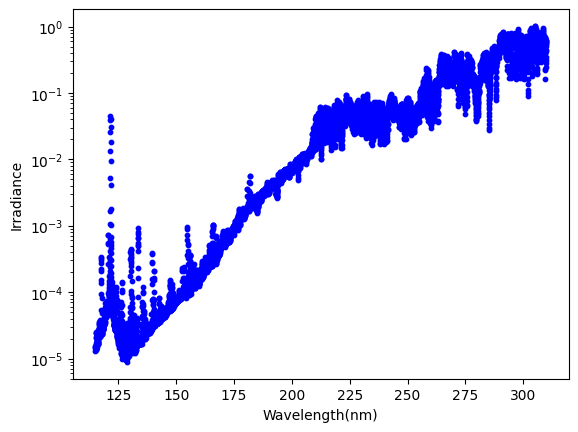

In [14]:
x = illum_df['WAVELENGTH']
y = illum_df['IRRADIANCE']
plt.yscale('log')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Irradiance')
plt.scatter(x,y, s=10, c='b', marker='o')
plt.show()

In [15]:
illum_df_1 = illum_df[(illum_df['WAVELENGTH'] >= 130) & (illum_df['WAVELENGTH'] <= 140)]
illum_df_1

,WAVELENGTH,IRRADIANCE
600,130.000,0.000017
601,130.025,0.000026
602,130.050,0.000040
603,130.075,0.000050
604,130.100,0.000038
...,...,...
996,139.900,0.000035
997,139.925,0.000039
998,139.950,0.000041
999,139.975,0.000038


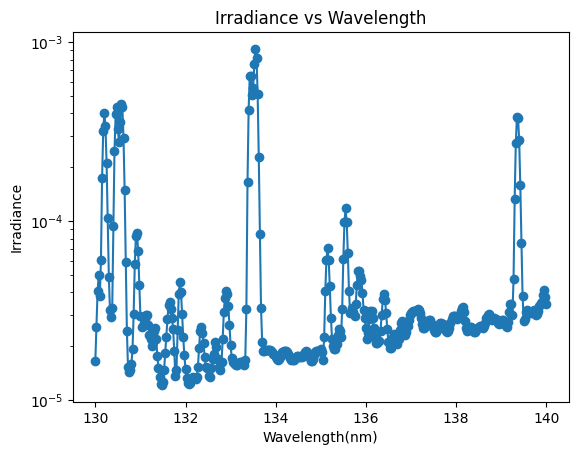

In [16]:
plt.plot(illum_df_1['WAVELENGTH'], illum_df_1['IRRADIANCE'], marker='o')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Irradiance')
plt.yscale("log") 
plt.title('Irradiance vs Wavelength')
#plt.grid(True)
plt.show()

In [17]:
df_130_140

,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION,EXPOSURE_TIME,BRIGHTNESS,Bin
15,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597,6786,6551.206109,1.307540e-04,130-140
17,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948,6786,6551.206109,1.959865e-04,130-140
109,130460,559,4,4,1346.377075,2.766167e+08,2365.993652,0.0,-25.721659,309.849426,-25.717978,309.853577,-25.717817,309.845276,-25.725418,309.845276,-25.725594,309.853546,45.813168,24.699697,3.566784,1.040501,0,5,134.625,73220.714927,1.292527,6786,6521.856735,1.981839e-04,130-140
133,130463,549,5,5,1328.250732,2.766167e+08,1651.128052,0.0,-25.722469,309.857697,-25.718761,309.861877,-25.718618,309.853577,-25.726233,309.853546,-25.726393,309.861877,45.813160,24.698910,3.276764,1.054741,0,5,132.825,73648.624122,0.896760,6786,6433.809002,1.393824e-04,130-140
169,130467,580,5,5,1384.452026,2.766167e+08,2213.496826,0.0,-25.723324,309.857697,-25.719616,309.861877,-25.719473,309.853546,-25.727087,309.853546,-25.727247,309.861847,45.813152,24.699747,3.276765,1.040501,0,5,138.425,73468.945920,1.205133,6786,6521.856735,1.847838e-04,130-140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18264752,1213262,570,8,8,1365.937256,2.766210e+08,2.814407,0.0,74.903282,129.100632,74.898521,129.082550,74.898483,129.118958,74.908028,129.118698,74.908089,129.082260,57.011570,106.544487,2.410226,1.008725,0,15,136.575,117436.222732,0.000959,6786,6727.301571,1.424964e-07,130-140
18264883,1213379,549,19,19,1327.868042,2.766210e+08,2.525487,0.0,74.926872,128.686508,74.921829,128.667389,74.922089,128.706116,74.931877,128.705582,74.931648,128.666824,57.009514,106.510391,0.973605,1.008725,0,15,132.775,130264.505744,0.000775,6786,6727.301571,1.152758e-07,130-140
18264891,1213387,579,20,20,1382.256470,2.766210e+08,2.949166,0.0,74.928291,128.647568,74.923233,128.628342,74.923515,128.667297,74.933327,128.666733,74.933075,128.627762,57.009373,106.507935,1.291601,1.008725,0,15,138.225,131525.501609,0.000897,6786,6727.301571,1.333240e-07,130-140
18265129,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062,6786,6727.301571,1.578955e-07,130-140


In [18]:
merged_df = pd.merge(df_130_140, illum_df_1, left_on='Wave_Bin', right_on='WAVELENGTH', how='left')

# Rename the 'Irradiance' column from df_filtered to 'S_Irradiance'
merged_df.rename(columns={'Irradiance': 'S_Irradiance'}, inplace=True)

# # Drop the extra 'Wavelength' column
merged_df.drop('WAVELENGTH_y', axis=1, inplace=True)

merged_df

,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH_x,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION,EXPOSURE_TIME,BRIGHTNESS,Bin,IRRADIANCE
0,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597,6786,6551.206109,1.307540e-04,130-140,0.000017
1,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948,6786,6551.206109,1.959865e-04,130-140,0.000032
2,130460,559,4,4,1346.377075,2.766167e+08,2365.993652,0.0,-25.721659,309.849426,-25.717978,309.853577,-25.717817,309.845276,-25.725418,309.845276,-25.725594,309.853546,45.813168,24.699697,3.566784,1.040501,0,5,134.625,73220.714927,1.292527,6786,6521.856735,1.981839e-04,130-140,0.000018
3,130463,549,5,5,1328.250732,2.766167e+08,1651.128052,0.0,-25.722469,309.857697,-25.718761,309.861877,-25.718618,309.853577,-25.726233,309.853546,-25.726393,309.861877,45.813160,24.698910,3.276764,1.054741,0,5,132.825,73648.624122,0.896760,6786,6433.809002,1.393824e-04,130-140,0.000022
4,130467,580,5,5,1384.452026,2.766167e+08,2213.496826,0.0,-25.723324,309.857697,-25.719616,309.861877,-25.719473,309.853546,-25.727087,309.853546,-25.727247,309.861847,45.813152,24.699747,3.276765,1.040501,0,5,138.425,73468.945920,1.205133,6786,6521.856735,1.847838e-04,130-140,0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41816,1213262,570,8,8,1365.937256,2.766210e+08,2.814407,0.0,74.903282,129.100632,74.898521,129.082550,74.898483,129.118958,74.908028,129.118698,74.908089,129.082260,57.011570,106.544487,2.410226,1.008725,0,15,136.575,117436.222732,0.000959,6786,6727.301571,1.424964e-07,130-140,0.000021
41817,1213379,549,19,19,1327.868042,2.766210e+08,2.525487,0.0,74.926872,128.686508,74.921829,128.667389,74.922089,128.706116,74.931877,128.705582,74.931648,128.666824,57.009514,106.510391,0.973605,1.008725,0,15,132.775,130264.505744,0.000775,6786,6727.301571,1.152758e-07,130-140,0.000015
41818,1213387,579,20,20,1382.256470,2.766210e+08,2.949166,0.0,74.928291,128.647568,74.923233,128.628342,74.923515,128.667297,74.933327,128.666733,74.933075,128.627762,57.009373,106.507935,1.291601,1.008725,0,15,138.225,131525.501609,0.000897,6786,6727.301571,1.333240e-07,130-140,0.000025
41819,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062,6786,6727.301571,1.578955e-07,130-140,0.000038


In [19]:
#Getting I/F
def i_f(df):
    df['I/F'] = df['BRIGHTNESS']/df['IRRADIANCE']
    df['I/F'] = df['I/F']/np.pi
    df['I/F'] = df['I/F']/((np.cos(df['INCIDENCE_ANGLE']*np.pi/180) + np.cos(df['EMISSION_ANGLE']*np.pi/180))/np.cos(df['INCIDENCE_ANGLE']*np.pi/180))

i_f(merged_df)

In [20]:
merged_df

,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH_x,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION,EXPOSURE_TIME,BRIGHTNESS,Bin,IRRADIANCE,I/F
0,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597,6786,6551.206109,1.307540e-04,130-140,0.000017,1.135242
1,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948,6786,6551.206109,1.959865e-04,130-140,0.000032,0.938967
2,130460,559,4,4,1346.377075,2.766167e+08,2365.993652,0.0,-25.721659,309.849426,-25.717978,309.853577,-25.717817,309.845276,-25.725418,309.845276,-25.725594,309.853546,45.813168,24.699697,3.566784,1.040501,0,5,134.625,73220.714927,1.292527,6786,6521.856735,1.981839e-04,130-140,0.000018,1.653744
3,130463,549,5,5,1328.250732,2.766167e+08,1651.128052,0.0,-25.722469,309.857697,-25.718761,309.861877,-25.718618,309.853577,-25.726233,309.853546,-25.726393,309.861877,45.813160,24.698910,3.276764,1.054741,0,5,132.825,73648.624122,0.896760,6786,6433.809002,1.393824e-04,130-140,0.000022,0.960223
4,130467,580,5,5,1384.452026,2.766167e+08,2213.496826,0.0,-25.723324,309.857697,-25.719616,309.861877,-25.719473,309.853546,-25.727087,309.853546,-25.727247,309.861847,45.813152,24.699747,3.276765,1.040501,0,5,138.425,73468.945920,1.205133,6786,6521.856735,1.847838e-04,130-140,0.000024,1.160176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41816,1213262,570,8,8,1365.937256,2.766210e+08,2.814407,0.0,74.903282,129.100632,74.898521,129.082550,74.898483,129.118958,74.908028,129.118698,74.908089,129.082260,57.011570,106.544487,2.410226,1.008725,0,15,136.575,117436.222732,0.000959,6786,6727.301571,1.424964e-07,130-140,0.000021,-0.000866
41817,1213379,549,19,19,1327.868042,2.766210e+08,2.525487,0.0,74.926872,128.686508,74.921829,128.667389,74.922089,128.706116,74.931877,128.705582,74.931648,128.666824,57.009514,106.510391,0.973605,1.008725,0,15,132.775,130264.505744,0.000775,6786,6727.301571,1.152758e-07,130-140,0.000015,-0.000992
41818,1213387,579,20,20,1382.256470,2.766210e+08,2.949166,0.0,74.928291,128.647568,74.923233,128.628342,74.923515,128.667297,74.933327,128.666733,74.933075,128.627762,57.009373,106.507935,1.291601,1.008725,0,15,138.225,131525.501609,0.000897,6786,6727.301571,1.333240e-07,130-140,0.000025,-0.000668
41819,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062,6786,6727.301571,1.578955e-07,130-140,0.000038,-0.000519


In [21]:
merged_df['PHASE_ANGLE'] = merged_df['INCIDENCE_ANGLE'] + merged_df['EMISSION_ANGLE']

merged_df

,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH_x,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION,EXPOSURE_TIME,BRIGHTNESS,Bin,IRRADIANCE,I/F,PHASE_ANGLE
0,130450,558,16,16,1344.564331,2.766167e+08,1744.589722,0.0,-25.720451,309.952026,-25.716507,309.956451,-25.716539,309.947632,-25.724346,309.947632,-25.724333,309.956451,45.813187,24.679129,0.035513,1.035840,0,5,134.450,81466.101110,0.856597,6786,6551.206109,1.307540e-04,130-140,0.000017,1.135242,24.714642
1,130450,587,7,7,1397.146362,2.766167e+08,2410.406982,0.0,-25.719988,309.874451,-25.716225,309.878693,-25.716114,309.870270,-25.723763,309.870239,-25.723890,309.878662,45.813187,24.693300,2.691593,1.035840,0,5,139.700,75093.612075,1.283948,6786,6551.206109,1.959865e-04,130-140,0.000032,0.938967,27.384893
2,130460,559,4,4,1346.377075,2.766167e+08,2365.993652,0.0,-25.721659,309.849426,-25.717978,309.853577,-25.717817,309.845276,-25.725418,309.845276,-25.725594,309.853546,45.813168,24.699697,3.566784,1.040501,0,5,134.625,73220.714927,1.292527,6786,6521.856735,1.981839e-04,130-140,0.000018,1.653744,28.266481
3,130463,549,5,5,1328.250732,2.766167e+08,1651.128052,0.0,-25.722469,309.857697,-25.718761,309.861877,-25.718618,309.853577,-25.726233,309.853546,-25.726393,309.861877,45.813160,24.698910,3.276764,1.054741,0,5,132.825,73648.624122,0.896760,6786,6433.809002,1.393824e-04,130-140,0.000022,0.960223,27.975674
4,130467,580,5,5,1384.452026,2.766167e+08,2213.496826,0.0,-25.723324,309.857697,-25.719616,309.861877,-25.719473,309.853546,-25.727087,309.853546,-25.727247,309.861847,45.813152,24.699747,3.276765,1.040501,0,5,138.425,73468.945920,1.205133,6786,6521.856735,1.847838e-04,130-140,0.000024,1.160176,27.976513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41816,1213262,570,8,8,1365.937256,2.766210e+08,2.814407,0.0,74.903282,129.100632,74.898521,129.082550,74.898483,129.118958,74.908028,129.118698,74.908089,129.082260,57.011570,106.544487,2.410226,1.008725,0,15,136.575,117436.222732,0.000959,6786,6727.301571,1.424964e-07,130-140,0.000021,-0.000866,108.954712
41817,1213379,549,19,19,1327.868042,2.766210e+08,2.525487,0.0,74.926872,128.686508,74.921829,128.667389,74.922089,128.706116,74.931877,128.705582,74.931648,128.666824,57.009514,106.510391,0.973605,1.008725,0,15,132.775,130264.505744,0.000775,6786,6727.301571,1.152758e-07,130-140,0.000015,-0.000992,107.483994
41818,1213387,579,20,20,1382.256470,2.766210e+08,2.949166,0.0,74.928291,128.647568,74.923233,128.628342,74.923515,128.667297,74.933327,128.666733,74.933075,128.627762,57.009373,106.507935,1.291601,1.008725,0,15,138.225,131525.501609,0.000897,6786,6727.301571,1.333240e-07,130-140,0.000025,-0.000668,107.799538
41819,1213611,586,10,10,1394.950562,2.766210e+08,3.173334,0.0,74.976898,129.025314,74.972076,129.006958,74.972092,129.043930,74.981674,129.043625,74.981682,129.006622,57.005436,106.469345,1.810364,1.008725,0,15,139.475,119499.221444,0.001062,6786,6727.301571,1.578955e-07,130-140,0.000038,-0.000519,108.279709


In [22]:
#filtration of data

filtered_df = merged_df[(merged_df['PHASE_ANGLE'] >= 25) & (merged_df['PHASE_ANGLE'] <= 90)]
filtered_df = filtered_df[filtered_df['I/F']<=1]




phase_angle_range = (25, 45)

filtered_data = filtered_df[~((filtered_df['I/F'] > 0.57) & filtered_df['PHASE_ANGLE'].between(*phase_angle_range))]

filtered_data = pd.concat([filtered_data, filtered_df[filtered_df['PHASE_ANGLE'].ge(phase_angle_range[1])]])


phase_angle_range = (45, 50)

filtered_data1 = filtered_data[~((filtered_data['I/F'] > 0.45) & filtered_data['PHASE_ANGLE'].between(*phase_angle_range))]

filtered_data1 = pd.concat([filtered_data1, filtered_data[filtered_data['PHASE_ANGLE'].ge(phase_angle_range[1])]])

phase_angle_range = (50, 60)

filtered_data2 = filtered_data1[~((filtered_data1['I/F'] > 0.40) & filtered_data1['PHASE_ANGLE'].between(*phase_angle_range))]

filtered_data2 = pd.concat([filtered_data2, filtered_data1[filtered_data1['PHASE_ANGLE'].ge(phase_angle_range[1])]])

phase_angle_range = (60, 70)

filtered_data3 = filtered_data2[~((filtered_data2['I/F'] > 0.37) & filtered_data2['PHASE_ANGLE'].between(*phase_angle_range))]

filtered_data3 = pd.concat([filtered_data3, filtered_data2[filtered_data2['PHASE_ANGLE'].ge(phase_angle_range[1])]])

phase_angle_range = (70, 80)

filtered_data4 = filtered_data3[~((filtered_data3['I/F'] > 0.27) & filtered_data3['PHASE_ANGLE'].between(*phase_angle_range))]
filtered_data4 = pd.concat([filtered_data4, filtered_data3[filtered_data3['PHASE_ANGLE'].ge(phase_angle_range[1])]])

phase_angle_range = (80, 85)

filtered_data5 = filtered_data4[~((filtered_data4['I/F'] > 0.25) & filtered_data4['PHASE_ANGLE'].between(*phase_angle_range))]
filtered_data5 = pd.concat([filtered_data5, filtered_data4[filtered_data4['PHASE_ANGLE'].ge(phase_angle_range[1])]])

phase_angle_range = (85, 90)

filtered_data6 = filtered_data5[~((filtered_data5['I/F'] > 0.21) & filtered_data5['PHASE_ANGLE'].between(*phase_angle_range))]
filtered_data6 = pd.concat([filtered_data6, filtered_data5[filtered_data5['PHASE_ANGLE'].ge(phase_angle_range[1])]])

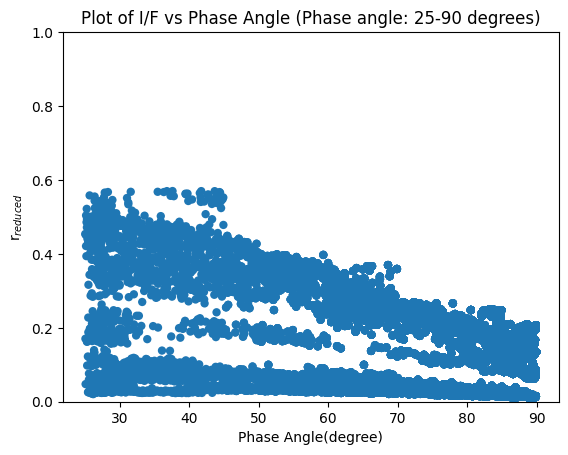

In [23]:
plt.figure(facecolor='white')
plt.scatter(filtered_data6['PHASE_ANGLE'], filtered_data6['I/F'], edgecolors='none')
#plt.colorbar(label='counts in bin')
plt.xlabel('Phase Angle(degree)')
plt.ylabel(r'r$_{reduced}$')
plt.title('Plot of I/F vs Phase Angle (Phase angle: 25-90 degrees)')
plt.ylim(0, 1)
#plt.grid(True)
plt.show()

In [24]:
filtered_data6

,HACK_TIME,DETECTOR_X,DETECTOR_Y,SPATIAL_ROW,WAVELENGTH_x,SCUT_TIME,WEIGHTED_COUNT,WEIGHTED_VARIANCE,LATITUDE,LONGITUDE,LATITUDE_LL,LONGITUDE_LL,LATITUDE_UL,LONGITUDE_UL,LATITUDE_UR,LONGITUDE_UR,LATITUDE_LR,LONGITUDE_LR,ALTITUDE,INCIDENCE_ANGLE,EMISSION_ANGLE,DEADTIME_FACTOR,PIX_DATA_QUAL,Long_Bin,Wave_Bin,A_eff(M2),PHOTON_COUNT,EXPOSURE_DURATION,EXPOSURE_TIME,BRIGHTNESS,Bin,IRRADIANCE,I/F,PHASE_ANGLE
7,130474,553,7,7,1335.500854,2.766167e+08,1755.464111,0.0,-25.725111,309.874420,-25.721350,309.878632,-25.721237,309.870239,-25.728886,309.870209,-25.729013,309.878632,45.813141,24.698313,2.691598,1.040501,0,5,133.550,74892.692268,0.937589,6786,6521.856735,0.000144,130-140,0.000918,0.023752,27.389912
16,130515,553,6,6,1335.500854,2.766167e+08,1794.888306,0.0,-25.733728,309.865967,-25.729992,309.870178,-25.729864,309.861786,-25.737495,309.861786,-25.737640,309.870148,45.813057,24.708336,2.985051,1.031220,0,5,133.550,74443.362653,0.964432,6786,6580.555331,0.000147,130-140,0.000918,0.024216,27.693386
21,130532,534,9,9,1301.067261,2.766167e+08,1518.350098,0.0,-25.737719,309.891235,-25.733908,309.895508,-25.733828,309.886993,-25.741510,309.886993,-25.741608,309.895508,45.813023,24.707443,2.099609,1.054741,0,5,130.100,76698.102057,0.791858,6786,6433.809002,0.000123,130-140,0.000038,0.486358,26.807053
23,130536,544,7,7,1319.188721,2.766167e+08,1692.427124,0.0,-25.738350,309.874329,-25.734587,309.878540,-25.734476,309.870148,-25.742125,309.870117,-25.742252,309.878540,45.813015,24.711266,2.691623,1.045205,0,5,131.900,74884.340167,0.904022,6786,6492.507754,0.000139,130-140,0.000040,0.523802,27.402889
24,130543,535,17,17,1302.879150,2.766167e+08,1546.487549,0.0,-25.740274,309.960754,-25.736315,309.965210,-25.736362,309.956329,-25.744188,309.956329,-25.744160,309.965210,45.813004,24.696878,0.338257,1.054741,0,5,130.275,82305.319607,0.751586,6786,6433.809002,0.000117,130-140,0.000104,0.170476,25.035135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22831,243379,553,6,6,1335.027344,2.766171e+08,1760.475464,0.0,-49.817326,311.741394,-49.812218,311.751465,-49.812386,311.731018,-49.822449,311.731384,-49.822350,311.751831,46.169388,48.379662,41.037090,1.013145,0,3,133.500,201522.544026,0.349435,6786,6697.952423,0.000052,130-140,0.000551,0.014100,89.416748
22890,243740,536,5,5,1304.223389,2.766171e+08,1439.983032,0.0,-49.894310,311.733826,-49.889252,311.743805,-49.889397,311.723541,-49.899414,311.723907,-49.899338,311.744171,46.172394,48.456791,40.890209,1.013145,0,3,130.400,197590.664029,0.291508,6786,6697.952423,0.000044,130-140,0.000094,0.069090,89.347000
22894,243766,562,4,4,1351.339111,2.766171e+08,2411.311279,0.0,-49.899929,311.714600,-49.894936,311.724457,-49.895054,311.704498,-49.905006,311.704834,-49.904953,311.724823,46.172611,48.463299,40.605381,1.045205,0,3,135.125,192538.797855,0.500951,6786,6492.507754,0.000077,130-140,0.000061,0.187995,89.068680
22999,244557,536,4,4,1304.223389,2.766171e+08,1985.211670,0.0,-50.068382,311.742554,-50.063358,311.752563,-50.063484,311.732300,-50.073483,311.732666,-50.073425,311.752930,46.179245,48.629971,40.934948,1.031220,0,3,130.400,196300.536394,0.404525,6786,6580.555331,0.000061,130-140,0.000094,0.097443,89.564919


In [25]:
filtered_df_final = filtered_data6[['INCIDENCE_ANGLE', 'EMISSION_ANGLE', 'PHASE_ANGLE', 'I/F']].copy()

In [26]:
filtered_df_final

,INCIDENCE_ANGLE,EMISSION_ANGLE,PHASE_ANGLE,I/F
7,24.698313,2.691598,27.389912,0.023752
16,24.708336,2.985051,27.693386,0.024216
21,24.707443,2.099609,26.807053,0.486358
23,24.711266,2.691623,27.402889,0.523802
24,24.696878,0.338257,25.035135,0.170476
...,...,...,...,...
22831,48.379662,41.037090,89.416748,0.014100
22890,48.456791,40.890209,89.347000,0.069090
22894,48.463299,40.605381,89.068680,0.187995
22999,48.629971,40.934948,89.564919,0.097443


In [27]:
bin_edges = list(range(0, 91))  # Bin edges from 0 to 90 (inclusive)

# Bin the first three columns and calculate the average of 'I/F' within each bin
binned_data = filtered_df_final.groupby([pd.cut(filtered_df_final['INCIDENCE_ANGLE'], bins=bin_edges),
                          pd.cut(filtered_df_final['EMISSION_ANGLE'], bins=bin_edges),
                          pd.cut(filtered_df_final['PHASE_ANGLE'], bins=bin_edges)])['I/F'].mean().reset_index()

# Create a new DataFrame with the bin edges and the average 'I/F' values
new_df = pd.DataFrame({
    'INCIDENCE_ANGLE': binned_data['INCIDENCE_ANGLE'].apply(lambda x: x.mid),
    'EMISSION_ANGLE': binned_data['EMISSION_ANGLE'].apply(lambda x: x.mid),
    'PHASE_ANGLE': binned_data['PHASE_ANGLE'].apply(lambda x: x.mid),
    'Average_I/F': binned_data['I/F']
})

new_df = new_df.dropna()

/tmp/ipykernel_243905/1444919284.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = filtered_df_final.groupby([pd.cut(filtered_df_final['INCIDENCE_ANGLE'], bins=bin_edges),


In [28]:
new_df

,INCIDENCE_ANGLE,EMISSION_ANGLE,PHASE_ANGLE,Average_I/F
194425,24.5,0.5,25.5,0.249050
194515,24.5,1.5,25.5,0.197805
194516,24.5,1.5,26.5,0.191376
194606,24.5,2.5,26.5,0.334651
194607,24.5,2.5,27.5,0.211385
...,...,...,...,...
384479,47.5,41.5,89.5,0.091681
384569,47.5,42.5,89.5,0.095620
392488,48.5,40.5,88.5,0.083523
392489,48.5,40.5,89.5,0.133038


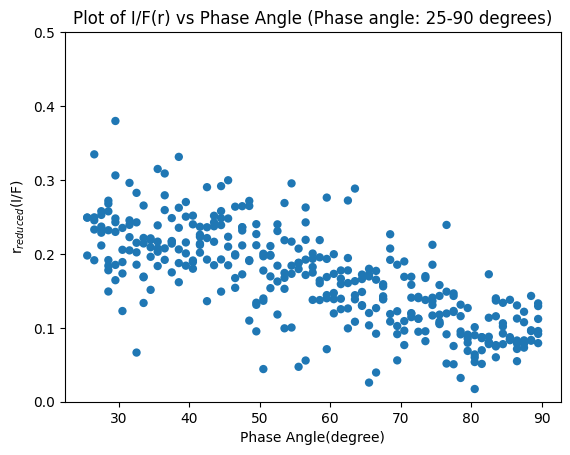

In [29]:
plt.figure(facecolor='white')
plt.scatter(new_df['PHASE_ANGLE'], new_df['Average_I/F'], edgecolors='none')
#plt.colorbar(label='counts in bin')
plt.xlabel('Phase Angle(degree)')
# plt.ylabel('I/F')
plt.ylabel(r'r$_{reduced}$(I/F)')
plt.title('Plot of I/F(r) vs Phase Angle (Phase angle: 25-90 degrees)')
plt.ylim(0, 0.5)
#plt.grid(True)
plt.show()

In [30]:
def model_function(x, b, w):
    # x is a tuple of the three input variables
    incidence_angle, emission_angle, phase_angle = x
    # Model equation
    hi=(1+2*incidence_angle*np.pi/180)/(1+2*incidence_angle*(np.pi/180)*np.sqrt(1-w))
    he=(1+2*emission_angle*np.pi/180)/(1+2*emission_angle*(np.pi/180)*np.sqrt(1-w))
    return (w/4)*(np.power((1-b),2)/np.power((1+2*b*np.cos(phase_angle*np.pi/180)+np.power(b,2)),3/2)+hi*he-1)

# Assuming df is your DataFrame with columns 'INCIDENCE_ANGLE', 'EMISSION_ANGLE', 'PHASE_ANGLE', and 'I/F'

# Prepare data
x_data = (new_df['INCIDENCE_ANGLE'], new_df['EMISSION_ANGLE'], new_df['PHASE_ANGLE'])
y_data = new_df['Average_I/F']

# Initial guess for the parameters
initial_guess = [-0.4, 0.09]

# Fit the model to the data
params, covariance = curve_fit(model_function, x_data, y_data, p0=initial_guess,maxfev=2000,method='lm')

# Extract the fitted parameters
b_fit, w_fit = params
errors = np.sqrt(np.diag(covariance))
# Print the fitted parameters
# print("Fitted parameters:")
# print("b =", b_fit)
# print("w =", w_fit)

for i, param in enumerate(params):
    if i==0:
        print(f'b: {param:.3f} ± {errors[i]:.3f}')
    else:
        print(f'w: {param:.3f} ± {errors[i]:.3f}')
    

b: -0.290 ± 0.011
w: 0.249 ± 0.009


36.73011363636363
20.664772727272727


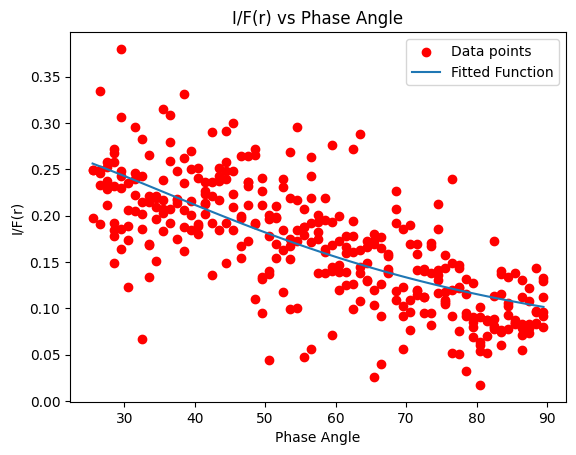

In [31]:
phase_angle_values = np.linspace(min(new_df['PHASE_ANGLE']), max(new_df['PHASE_ANGLE']), 100)

if new_df['PHASE_ANGLE'].dtype.name == 'category':
    new_df['PHASE_ANGLE'] = new_df['PHASE_ANGLE'].astype(float)
    new_df['INCIDENCE_ANGLE'] = new_df['INCIDENCE_ANGLE'].astype(float)
    new_df['EMISSION_ANGLE'] = new_df['EMISSION_ANGLE'].astype(float)


incidence_angle_mean = new_df['INCIDENCE_ANGLE'].mean()
emission_angle_mean = new_df['EMISSION_ANGLE'].mean()

print(incidence_angle_mean)
print(emission_angle_mean)
fitted_values = model_function((incidence_angle_mean, emission_angle_mean, phase_angle_values), b_fit, w_fit)
plt.scatter(new_df['PHASE_ANGLE'], new_df['Average_I/F'], c='red',label='Data points')
plt.plot(phase_angle_values, fitted_values, label='Fitted Function')
plt.xlabel('Phase Angle')
plt.ylabel('I/F(r)')
plt.title('I/F(r) vs Phase Angle')
plt.legend()
plt.show()

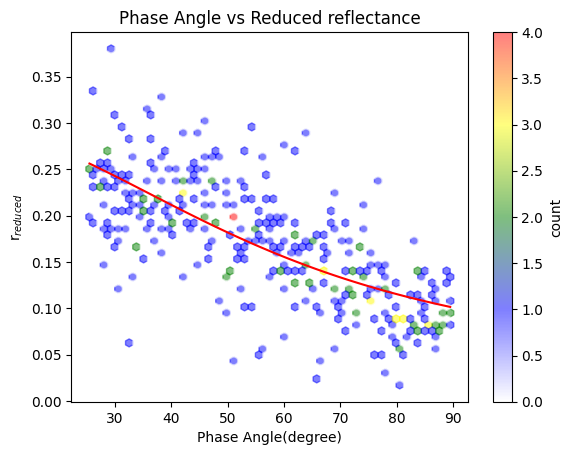

In [32]:
import matplotlib.colors as mcolors

# Define custom colormap
colors = ['white', 'blue', 'green', 'yellow', 'red']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
fitted_values = model_function((incidence_angle_mean, emission_angle_mean, phase_angle_values), b_fit, w_fit)
plt.hexbin(new_df['PHASE_ANGLE'], new_df['Average_I/F'], gridsize=50, cmap=cmap , alpha=0.5, label='data points')
plt.plot(phase_angle_values, fitted_values, label='Fitted Function',color='red')
plt.colorbar(label='count')  # Add a colorbar showing count
plt.xlabel('Phase Angle(degree)')
plt.ylabel(r'r$_{reduced}$')
plt.title('Phase Angle vs Reduced reflectance')
plt.gca().set_facecolor('white')
plt.show()